<a href="https://colab.research.google.com/github/Kallukalluzzz/Mini-Project/blob/main/LSTM_AUTOENCODER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import os
from pandas_profiling import ProfileReport
!pip install matplotlib
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
data=pd.read_csv("/content/DGA dataset_new.csv")

In [3]:
data

,NM,H2,CH4,C2H6,C2H4,C2H2,Type
0,1,3930.0,2397.0,157.0,0.0,0.0,Partial discharge
1,2,37800.0,1740.0,249.0,8.0,8.0,Partial discharge
2,3,92600.0,10200.0,0.0,0.0,0.0,Partial discharge
3,4,8266.0,1061.0,22.0,0.0,0.0,Partial discharge
4,5,9340.0,995.0,60.0,6.0,7.0,Partial discharge
...,...,...,...,...,...,...,...
266,267,2443.0,3422.0,7852.0,3000.0,6394.0,No fault
267,268,4395.0,5201.0,6933.0,6788.0,2121.0,No fault
268,269,7613.0,1120.0,3363.0,4751.0,3393.0,No fault
269,270,2366.0,1031.0,5909.0,108.0,7025.0,No fault


In [4]:
X=data.drop(['Type'],axis=1)
Y=data['Type']

In [5]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,train_size=0.5)

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Xtrain = pd.DataFrame(scaler.fit_transform(Xtrain))
Xtrain.sample(frac=1)

Xtest = pd.DataFrame(scaler.transform(Xtest))

In [7]:
Xtrain

,0,1,2,3,4,5
0,0.000000,0.016963,0.002360,0.000054,0.000000,0.000000e+00
1,0.445693,0.001389,0.002157,0.001412,0.005347,2.612269e-05
2,0.400749,0.000103,0.000146,0.000052,0.000213,1.434656e-06
3,0.434457,0.000270,0.000259,0.000048,0.000396,4.782186e-07
4,0.026217,0.000626,0.000222,0.000082,0.000347,8.084884e-04
...,...,...,...,...,...,...
130,0.655431,0.001436,0.000306,0.000037,0.000419,1.399686e-03
131,0.063670,0.000431,0.000049,0.000015,0.000013,1.046103e-05
132,0.153558,0.010466,0.003181,0.000000,0.002455,1.509378e-03
133,0.756554,0.004593,0.001837,0.009919,0.721920,8.039871e-01


In [8]:
Xtrain = Xtrain.values.reshape(-1, 1, 3)

Xtest  = Xtest.values.reshape(-1, 1, 3)

In [9]:
Xtrain

array([[[0.00000000e+00, 1.69629610e-02, 2.36010642e-03]],

       [[5.44483026e-05, 0.00000000e+00, 0.00000000e+00]],

       [[4.45692884e-01, 1.38876291e-03, 2.15668348e-03]],

       [[1.41211673e-03, 5.34693289e-03, 2.61226930e-05]],

       [[4.00749064e-01, 1.03325077e-04, 1.45877266e-04]],

       [[5.20971259e-05, 2.13445816e-04, 1.43465591e-06]],

       [[4.34456929e-01, 2.70266388e-04, 2.59255799e-04]],

       [[4.80135032e-05, 3.96122534e-04, 4.78218636e-07]],

       [[2.62172285e-02, 6.25901658e-04, 2.22441698e-04]],

       [[8.16724539e-05, 3.46663738e-04, 8.08488381e-04]],

       [[1.76029963e-01, 2.66777756e-05, 6.67325094e-06]],

       [[2.47492284e-06, 6.45957276e-06, 8.96659942e-06]],

       [[7.75280899e-01, 4.92512780e-03, 1.72169874e-03]],

       [[1.10431057e-02, 6.78500604e-01, 9.67091086e-01]],

       [[7.45318352e-01, 4.76711328e-03, 1.73949408e-03]],

       [[1.07485899e-02, 7.36892989e-01, 8.15144586e-01]],

       [[7.04119850e-01, 2.46256390e-05,

In [10]:
from keras.layers import Input, Dropout, Dense, LSTM, RepeatVector, TimeDistributed
from keras.models import Model, Sequential, load_model
from keras import regularizers

In [18]:
# Input layer:
model=Sequential([
    LSTM(32, activation='relu', input_shape=(Xtrain.shape[1],Xtrain.shape[2])),
    Dropout(0.2),
    RepeatVector(Xtrain.shape[1]),
    LSTM(32, activation='relu', return_sequences=True),
    Dropout(0.2),
    Dense(16),
    TimeDistributed(Dense(Xtrain.shape[2]))
])

model.compile(loss='mse',optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 32)                4608      
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 repeat_vector_2 (RepeatVect  (None, 1, 32)            0         
 or)                                                             
                                                                 
 lstm_5 (LSTM)               (None, 1, 32)             8320      
                                                                 
 dropout_5 (Dropout)         (None, 1, 32)             0         
                                                                 
 dense_4 (Dense)             (None, 1, 16)             528       
                                                      

In [19]:
# Train model for 100 epochs, batch size of 1000: 
NUM_EPOCHS=100
BATCH_SIZE=1

history=model.fit(Xtrain,Xtrain, 
                  batch_size=BATCH_SIZE, 
                  epochs=NUM_EPOCHS,
                  validation_split=0.1,
                  shuffle=True)

Epoch 1/100
243/243 [==============================] - 4s 7ms/step - loss: 0.0537 - accuracy: 0.5844 - val_loss: 0.0294 - val_accuracy: 0.5926
Epoch 2/100
243/243 [==============================] - 1s 4ms/step - loss: 0.0214 - accuracy: 0.5926 - val_loss: 0.0176 - val_accuracy: 0.5926
Epoch 3/100
243/243 [==============================] - 1s 4ms/step - loss: 0.0145 - accuracy: 0.6008 - val_loss: 0.0090 - val_accuracy: 0.5926
Epoch 4/100
243/243 [==============================] - 1s 3ms/step - loss: 0.0090 - accuracy: 0.6502 - val_loss: 0.0035 - val_accuracy: 0.5926
Epoch 5/100
243/243 [==============================] - 1s 4ms/step - loss: 0.0065 - accuracy: 0.6502 - val_loss: 0.0021 - val_accuracy: 0.5926
Epoch 6/100
243/243 [==============================] - 1s 4ms/step - loss: 0.0078 - accuracy: 0.6667 - val_loss: 0.0026 - val_accuracy: 0.5926
Epoch 7/100
243/243 [==============================] - 1s 4ms/step - loss: 0.0071 - accuracy: 0.6502 - val_loss: 0.0018 - val_accuracy: 0.7407

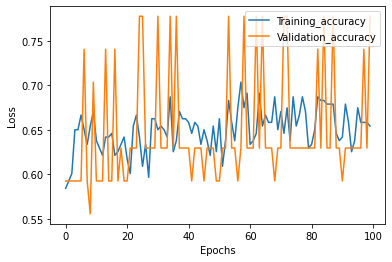

In [21]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training_accuracy')
plt.plot(history.history['val_accuracy'], label='Validation_accuracy')
#plt.ylim(0,1)
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

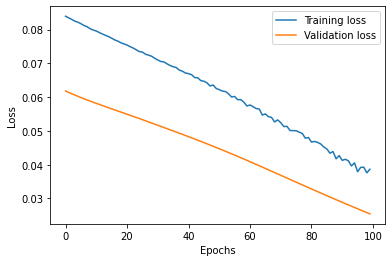

In [102]:

%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [101]:
plt.show()